<a href="https://colab.research.google.com/github/Tanjul5/World-Bank-Education-EDA-capston-1/blob/main/Copy_of_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is World Bank Group?

The World Bank Group is the largest financier of education in the developing country and work on education programs in more than 80 countries. 

## <b>What is World Bank and what does it do?<b>

The World Bank is an international development organization and  world's largest sources of funding and knowledge for developing countries. The World Bank play important role to reduce poverty by lending money to middle and low income countries and to improve the standard of living of their people.

## <b> What is the purpose of Global Education?<b>

The main purpose is opening a global dimension and a holistic perspective in education in order to help and understand the complex realities, develope values, knowledge and skills that enable them to face the challenges.



Global education aims at developing learning communities, in which learners and educators are encouraged to work cooperatively on global issues. Global education aims at stimulating and motivating learners and educators to approach global issues through innovative teaching and pedagogy.

### Let's take a look at the problem statement

### <b>The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data.<b>
Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.

Import all libraries

In [121]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
!pip install tensorflow==2.0.0.alpha0

##### Let's Mount the Drive and analyse the data...

In [123]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


######Now first try to understand all the Datasets and it's relevence with the problem.....

In [124]:
working_path = '/content/drive/MyDrive/Colab Notebooks'


Take working path of all the Datasets together

In [125]:
Edstats_country_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsCountry.csv')
Edstats_country_series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsCountry-Series.csv')
Edstats_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsData.csv')
Edstats_footnotes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsFootNote.csv')
Edstats_series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsSeries.csv')



##<b>EdStats Country

The data which has many values in it with a rows and columns

In [126]:
Edstats_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [127]:
Edstats_country_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [128]:
Edstats_country_df.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

##<b>EdStats Series<b>

Here are the series data also which has many rows and columns

In [129]:
Edstats_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [130]:
Edstats_series_df.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
Edstats_series_df.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [132]:
Edstats_series_df.tail()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##<b> EdStats Country-Series<b>

In [133]:
Edstats_country_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [134]:
list(Edstats_country_series_df.columns)

['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3']

In [135]:
Edstats_country_series_df.groupby("SeriesCode").first().reset_index()

,SeriesCode,CountryCode,DESCRIPTION,Unnamed: 3
0,NY.GDP.MKTP.PP.CD,AFG,Estimates are based on regression.,NaN
1,NY.GDP.MKTP.PP.KD,AFG,Estimates are based on regression.,NaN
2,NY.GDP.PCAP.CD,CYP,Data are for areas under the effective control...,NaN
3,NY.GDP.PCAP.KD,CYP,Data are for areas under the effective control...,NaN
4,NY.GDP.PCAP.PP.CD,AFG,Estimates are based on regression.,NaN
5,NY.GDP.PCAP.PP.KD,AFG,Estimates are based on regression.,NaN
6,NY.GNP.MKTP.PP.CD,AFG,Estimates are based on regression.,NaN
7,NY.GNP.PCAP.CD,CYP,Data are for areas under the effective control...,NaN
8,NY.GNP.PCAP.PP.CD,AFG,Estimates are based on regression.,NaN
9,SP.POP.0014.FE.IN,GEO,Derived using ratio of age group from WPP and ...,NaN


We have many unnamed columns in each <b>DataFrame</b> as we checked above but two datasets are left to be checked. Here we see that in Edstats country series data some important columns are noticed but they are also present in Edstatsdata so, we can ignore this datasheet.

##<b>EdStats Data<b>

In [136]:
Edstats_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [137]:
Edstats_data_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
Edstats_data_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [139]:
Edstats_data_df.describe

<bound method NDFrame.describe of        Country Name Country Code  ... 2100 Unnamed: 69
0        Arab World          ARB  ...  NaN         NaN
1        Arab World          ARB  ...  NaN         NaN
2        Arab World          ARB  ...  NaN         NaN
3        Arab World          ARB  ...  NaN         NaN
4        Arab World          ARB  ...  NaN         NaN
...             ...          ...  ...  ...         ...
886925     Zimbabwe          ZWE  ...  NaN         NaN
886926     Zimbabwe          ZWE  ...  NaN         NaN
886927     Zimbabwe          ZWE  ...  NaN         NaN
886928     Zimbabwe          ZWE  ...  NaN         NaN
886929     Zimbabwe          ZWE  ...  NaN         NaN

[886930 rows x 70 columns]>

##<b> EdStats FootNotes

In [140]:
Edstats_data_df['Country Name'].value_counts()

Curacao                                         3665
Dominica                                        3665
Barbados                                        3665
Least developed countries: UN classification    3665
Uganda                                          3665
                                                ... 
Sub-Saharan Africa (excluding high income)      3665
Colombia                                        3665
Netherlands                                     3665
French Polynesia                                3665
Euro area                                       3665
Name: Country Name, Length: 242, dtype: int64

In [141]:
Edstats_footnotes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [142]:
Edstats_footnotes_df.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [143]:
Edstats_footnotes_df.isnull().tail

<bound method NDFrame.tail of         CountryCode  SeriesCode   Year  DESCRIPTION  Unnamed: 4
0             False       False  False        False        True
1             False       False  False        False        True
2             False       False  False        False        True
3             False       False  False        False        True
4             False       False  False        False        True
...             ...         ...    ...          ...         ...
643633        False       False  False        False        True
643634        False       False  False        False        True
643635        False       False  False        False        True
643636        False       False  False        False        True
643637        False       False  False        False        True

[643638 rows x 5 columns]>

We have checked all the datasets and there are many unnamed and null values present....

## <b> Dropping unnamed and null columns<b>

We have to drop all the unnamed and null values to clear out the datasets.

In [144]:
Edstats_data_df.drop(['Unnamed: 69'],axis=1,inplace=True)
Edstats_country_series_df.drop(['Unnamed: 3'],axis=1,inplace=True)
Edstats_series_df.drop(['Unnamed: 20','License Type','Related indicators','Other web links'],axis=1,inplace=True)
Edstats_country_df.drop(['Unnamed: 31'],axis=1,inplace=True)
Edstats_footnotes_df.drop(['Unnamed: 4'],axis=1,inplace=True) 

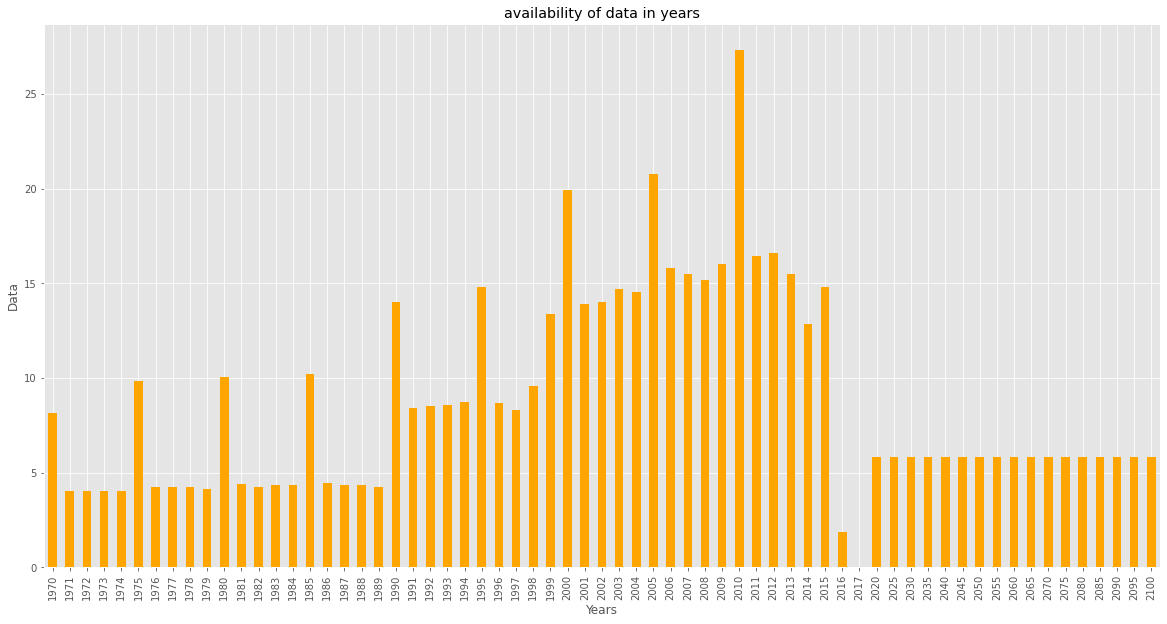

In [145]:
#Plotting graph for data availabilty in the years (in %)
dataset1 = Edstats_data_df.loc[:,'1970':'2100'].notnull().sum()/len(Edstats_data_df)*100
plt.figure(figsize=(20,10))
plt.subplot()
dataset1.plot(kind='bar', color='orange')
plt.title('availability of data in years')
plt.xlabel('Years')
plt.ylabel('Data')
plt.show()

Mean of all years data

In [146]:
 Edstats_data_df.loc[:,'1970':'2100'].notnull().sum()/len(Edstats_data_df)*100

1970    8.150361
1971    4.006742
1972    4.015988
1973    4.007644
1974    4.028503
          ...   
2080    5.799330
2085    5.799330
2090    5.799330
2095    5.799330
2100    5.799330
Length: 65, dtype: float64

In [147]:
column_list= list(Edstats_data_df)

In [148]:
#Figuring out the number of years which have huge data
column_list= list(Edstats_data_df)
for i in range(len(column_list)):
  if i >33 and i<50:
    print(column_list[i])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [149]:
grouped=Edstats_data_df.groupby(['Indicator Name','Country Name']).first().reset_index()
grouped

,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,"Adjusted net enrolment rate, lower secondary, ...",Afghanistan,AFG,UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.260189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Adjusted net enrolment rate, lower secondary, ...",Albania,ALB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.558281,85.306610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.666588,88.778252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Adjusted net enrolment rate, lower secondary, ...",Algeria,DZA,UIS.NERA.2,NaN,9.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.43399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.367668,57.795860,59.062691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Adjusted net enrolment rate, lower secondary, ...",American Samoa,ASM,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Adjusted net enrolment rate, lower secondary, ...",Andorra,AND,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,"Youth literacy rate, population 15-24 years, m...",West Bank and Gaza,PSE,SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.913628,NaN,NaN,NaN,NaN,NaN,NaN,99.024890,NaN,99.039300,99.134160,99.210450,99.232980,99.211350,99.259860,99.345160,99.418830,99.405790,99.41047,99.45153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,"Youth literacy rate, population 15-24 years, m...",World,WLD,SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.827705,87.827705,87.827705,87.827705,87.827705,87.830467,87.827705,87.827705,87.827705,87.827705,90.468765,90.468765,90.468765,90.468765,90.468765,90.470619,90.468765,90.468765,90.468765,90.468765,92.583031,92.583031,92.583031,92.583031,92.583031,92.584358,92.583031,92.583031,92.583031,92.583031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,"Youth literacy rate, population 15-24 years, m...","Yemen, Rep.",YEM,SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.804222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,"Youth literacy rate, population 15-24 years, m...",Zambia,ZMB,SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.269348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.615600,NaN,NaN,

Make a Bar graph between different Country with specific one indicator

In [150]:
graph1=Edstats_data_df[(Edstats_data_df['Country Name'] =='India' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()

In [151]:
graph1

1970    63.10
1975    62.36
1980    62.50
1985    55.22
1990    45.11
1995    37.21
2000    30.22
2005    12.62
2010    11.09
dtype: float64

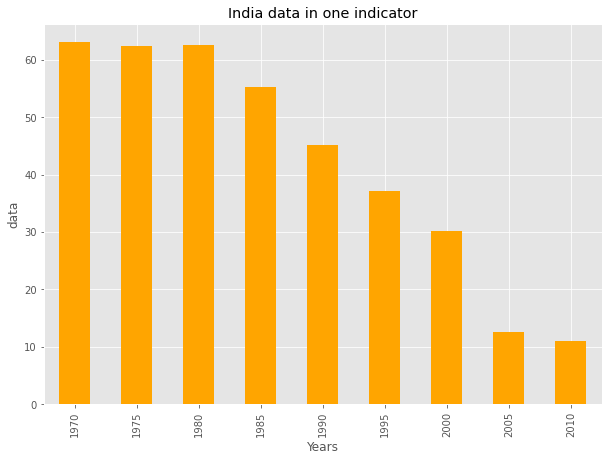

In [152]:
dataset1 = graph1
plt.figure(figsize=(10,7))
plt.subplot()
dataset1.plot(kind='bar', color='orange')
plt.title('India data in one indicator')
plt.xlabel('Years')
plt.ylabel('data')
plt.show()

In [153]:
graph2=Edstats_data_df[(Edstats_data_df['Country Name'] =='China' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
graph2

1970    7.78
1975    7.78
1980    3.39
1985    3.08
1990    4.45
1995    2.45
2000    1.32
2005    0.81
2010    0.49
dtype: float64

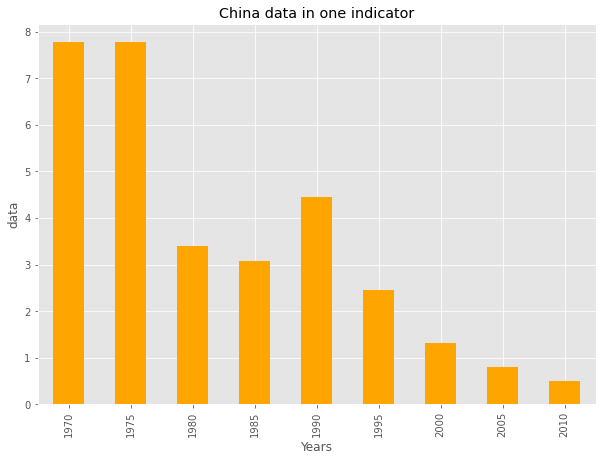

In [154]:
dataset1 = graph2
plt.figure(figsize=(10,7))
plt.subplot()
dataset1.plot(kind='bar', color='orange')
plt.title('China data in one indicator')
plt.xlabel('Years')
plt.ylabel('data')
plt.show()

In [155]:
graph3=Edstats_data_df[(Edstats_data_df['Country Name'] =='Russian Federation' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
graph3

1970    0.20
1975    0.14
1980    1.39
1985    1.05
1990    0.09
1995    0.30
2000    0.40
2005    0.10
2010    0.58
dtype: float64

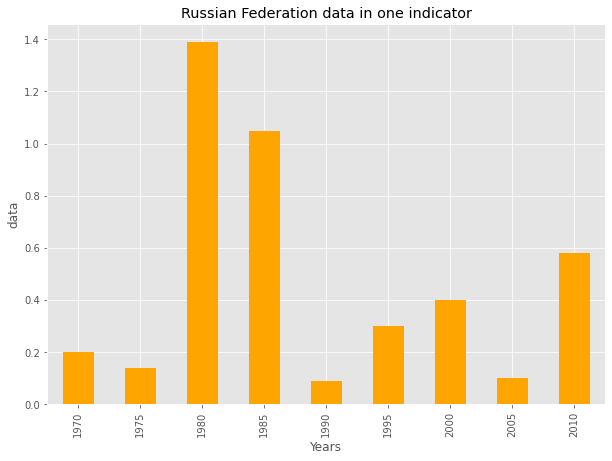

In [156]:
dataset1 = graph3
plt.figure(figsize=(10,7))
plt.subplot()
dataset1.plot(kind='bar', color='orange')
plt.title('Russian Federation data in one indicator')
plt.xlabel('Years')
plt.ylabel('data')
plt.show()

In [159]:
#graph4=Edstats_data_df[(Edstats_data_df['Country Name'] =='Arab World' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
#dataset1 = graph4
#plt.figure(figsize=(10,7))
#plt.subplot()
#dataset1.plot(kind='bar', color='orange')
#plt.title('World data in one indicator')
#plt.xlabel('Years')
#plt.ylabel('data')
#plt.show()

plote another graphs with different indicator code

In [160]:
graph5=Edstats_data_df[(Edstats_data_df['Indicator Code']=='SE.PRM.TENR') & (Edstats_data_df['Country Name'] =='Russian Federation')] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()


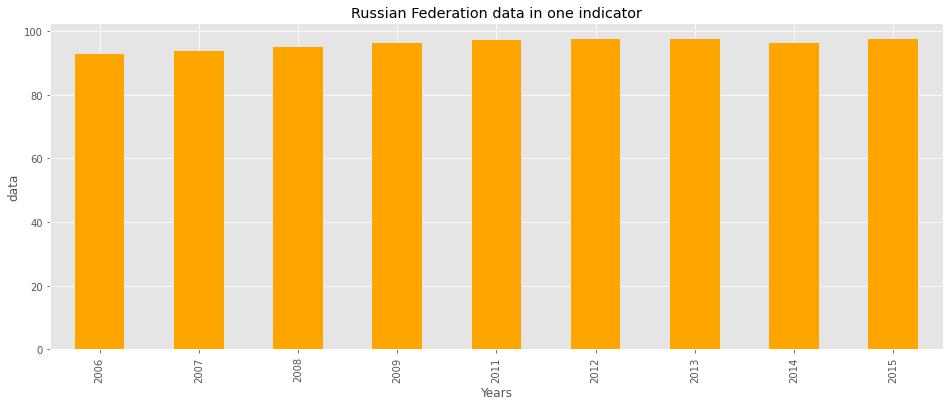

In [161]:
dataset1 = graph5
plt.figure(figsize=(16,6))
plt.subplot()
dataset1.plot(kind='bar', color='orange')
plt.title('Russian Federation data in one indicator')
plt.xlabel('Years')
plt.ylabel('data')
plt.show()

In [162]:
graph6=Edstats_data_df[(Edstats_data_df['Indicator Code']=='SE.PRM.TENR') & (Edstats_data_df['Country Name'] =='Brazil')] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()


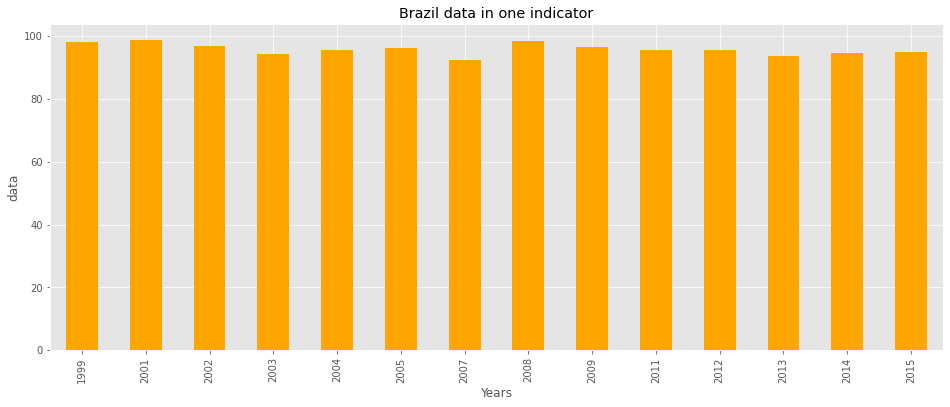

In [163]:
dataset1 = graph6
plt.figure(figsize=(16,6))
plt.subplot()
dataset1.plot(kind='bar', color='orange')
plt.title('Brazil data in one indicator')
plt.xlabel('Years')
plt.ylabel('data')
plt.show()

In [164]:
graph7=Edstats_data_df[(Edstats_data_df['Indicator Code']=='SE.PRM.TENR') & (Edstats_data_df['Country Name'] =='China')] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
graph7

Series([], dtype: float64)

In [165]:
graph8=Edstats_data_df[(Edstats_data_df['Indicator Code']=='SE.PRM.TENR') & (Edstats_data_df['Country Name'] =='World')] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
graph8

1970    72.353142
1971    72.258461
1972    73.130409
1973    75.258324
1974    75.926712
1975    77.053207
1976    77.671318
1977    77.641930
1978    76.567047
1979    76.882843
1980    78.008720
1981    78.739258
1982    79.171501
1983    79.410240
1984    79.651604
1985    80.246422
1986    81.013268
1987    81.318687
1988    81.945198
1989    82.377724
1990    82.318047
1991    82.638046
1992    82.590897
1993    82.715782
1994    82.828880
1995    82.582642
1996    82.397293
1997    82.698830
1998    83.322060
1999    84.134033
2000    84.990417
2001    85.428032
2002    86.442413
2003    87.696312
2004    88.759911
2005    88.835770
2006    89.233521
2007    90.410072
2008    90.643913
2009    90.512466
2010    90.719559
2011    90.883148
2012    91.206787
2013    91.172462
2014    91.264053
2015    91.155090
dtype: float64

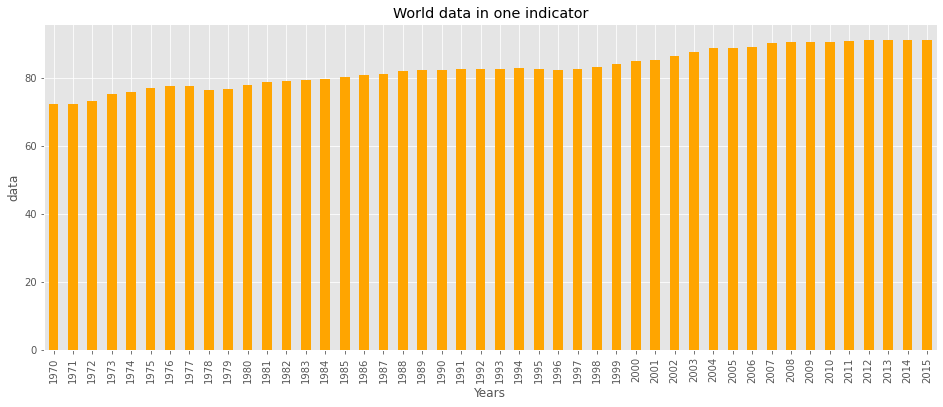

In [166]:
dataset1 = graph8
plt.figure(figsize=(16,6))
plt.subplot()
dataset1.plot(kind='bar', color='orange')
plt.title('World data in one indicator')
plt.xlabel('Years')
plt.ylabel('data')
plt.show()

In [167]:
countryComparision_df=Edstats_data_df[(Edstats_data_df['Country Name'] =='World')].reset_index()
countryComparision_df


,index,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,87960,World,WLD,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,87961,World,WLD,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87962,World,WLD,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87963,World,WLD,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87964,World,WLD,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,72.353142,72.258461,73.130409,75.258324,75.926712,77.053207,77.671318,77.64193,76.567047,76.882843,78.00872,78.739258,79.171501,79.41024,79.651604,80.246422,81.013268,81.318687,81.945198,82.377724,82.318047,82.638046,82.590897,82.715782,82.828880,82.582642,82.397293,82.698830,83.322060,84.134033,84.990417,85.428032,86.442413,87.696312,88.759911,88.835770,89.233521,90.410072,90.643913,90.512466,90.719559,90.883148,91.206787,91.172462,91.264053,91.15509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,91620,World,WLD,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,91621,World,WLD,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.335480,83.335480,83.335480,83.335480,83.335480,83.339592,83.335480,83.335480,83.335480,83.335480,87.266312,87.266312,87.266312,87.266312,87.266312,87.269073,87.266312,87.266312,87.266312,87.266312,90.618355,90.618355,90.618355,90.618355,90.618355,90.620171,90.618355,90.618355,90.618355,90.618355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,91622,World,WLD,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.730957,78.730957,78.730957,78.730957,78.730957,78.736488,78.730957,78.730957,78.730957,78.730957,83.986298,83.986298,83.986298,83.986298,83.986298,83.989998,83.986298,83.986298,83.986298,83.986298,88.612938,88.612938,88.612938,88.612938,88.612938,88.615257,88.612938,88.612938,88.612938,88.612938,NaN,NaN

In [ ]:
countryComparision_df.tail()


In [ ]:
Edstats_data_df[(Edstats_data_df['Indicator Code']=='SE.PRM.TENR') & (Edstats_data_df['Country Name'] =='World')]

In [ ]:
# Capturing Top 5 Indicator names :

# Adjusted net enrolment rate, primary, both sexes (%)
# Adjusted net enrolment rate, upper secondary, both sexes (%)
# Adult illiterate population, 15+ years, both sexes (number)
# Adult literacy rate, population 15+ years, both sexes (%)

# Current education expenditure, primary (% of total expenditure in primary public institutions)
# Primary education, pupils (% female)
# Primary education, teachers (% female)
# Secondary education, general pupils (% female)
# Secondary education, pupils (% female)
# Secondary education, teachers (% female)


#limited indicators (Top 10)
#Top 5 countries (USA,INDIA,CHINA,RUSSIA,ISRAEL)
#2000 - 2015 (Years)
#Analyses 
#Correlation between indicators 




In [169]:
#fetching indicator codes
indicator_counts= dict(Counter(Edstats_data_df['Indicator Name']))
indicator_names = sorted(set(indicator_counts.keys()))
indicator_names

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [170]:

indicator_counts= dict(Counter(Edstats_data_df['Indicator Name']))
indicator_names = sorted(set(indicator_counts.keys()))
indicator_names
for i in range(len(indicator_names)):
  if "PISA" in indicator_names[i] and "both gender" in indicator_names[i]:
    print(indicator_names[i])

In [171]:
 print(indicator_names[i])

Youth literacy rate, population 15-24 years, male (%)


In [172]:
indicator_counts

{'Adjusted net enrolment rate, lower secondary, both sexes (%)': 242,
 'Adjusted net enrolment rate, lower secondary, female (%)': 242,
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)': 242,
 'Adjusted net enrolment rate, lower secondary, male (%)': 242,
 'Adjusted net enrolment rate, primary, both sexes (%)': 242,
 'Adjusted net enrolment rate, primary, female (%)': 242,
 'Adjusted net enrolment rate, primary, gender parity index (GPI)': 242,
 'Adjusted net enrolment rate, primary, male (%)': 242,
 'Adjusted net enrolment rate, upper secondary, both sexes (%)': 242,
 'Adjusted net enrolment rate, upper secondary, female (%)': 242,
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)': 242,
 'Adjusted net enrolment rate, upper secondary, male (%)': 242,
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)': 242,
 'Adjusted net intake rate to Grade 1 of primary education, female (%)': 242,
 'Adjusted net intake rate to

In [173]:
#fetching country names:
CountryName=set()
for i in Edstats_data_df['Country Name']:
  CountryName.add(i)
CountryName

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',


In [174]:
CN=list(CountryName)
length=[]
countries=[]
  
for i in range(len(CountryName)):
  countryComparision_df=Edstats_data_df[(Edstats_data_df['Country Name'] == CN[i])][[column_list[i] for i in range(len(column_list)) if i >34 and i<51 ]].reset_index()
  Edstats=(countryComparision_df.count(axis=1))
  for i in range(len(Edstats)):
    length.append(Edstats[i])
  countries.append((sum(length)/(3665*22*242)*100))


In [175]:
countryComparision_df

,index,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,425140,NaN,NaN,34.275501,38.758469,NaN,NaN,41.076061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,425141,NaN,NaN,31.774731,34.533859,NaN,NaN,38.526581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,425142,NaN,NaN,0.867420,0.807950,NaN,NaN,0.885850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,425143,NaN,NaN,36.631168,42.742531,NaN,NaN,43.490860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,425144,NaN,NaN,94.246178,93.017464,NaN,NaN,92.311699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,428800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.479508e+06,NaN,NaN,NaN
3661,428801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.231889e+01,NaN,NaN,NaN
3662,428802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.863865e+01,NaN,NaN,NaN
3663,428803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.532100e-01,NaN,NaN,NaN


In [176]:
countrydatapercent=zip(CountryName,countries) 
list(countrydatapercent)

[('Rwanda', 0.07176440079825916),
 ('Norway', 0.1603129487517207),
 ('Albania', 0.23836051425601898),
 ('Djibouti', 0.303841750348239),
 ('Burkina Faso', 0.3877881107763962),
 ('Ireland', 0.47252883542105917),
 ('Ukraine', 0.5560703263453198),
 ('Guinea-Bissau', 0.6013798362687226),
 ('Virgin Islands (U.S.)', 0.6223203020019002),
 ('Middle East & North Africa', 0.6662614555007416),
 ('South Africa', 0.7402398262443587),
 ('Bermuda', 0.7849343445162731),
 ('Turkey', 0.8713047970373802),
 ('Low income', 0.9162043125264575),
 ('St. Vincent and the Grenadines', 0.9802146935855346),
 ('Philippines', 1.0589438748368991),
 ('Singapore', 1.1167684648680893),
 ('Paraguay', 1.1936782958171344),
 ('Luxembourg', 1.2686457781335618),
 ('Cameroon', 1.3462833492035344),
 ('North America', 1.3870777954189273),
 ('Guinea', 1.4622810245350921),
 ('Hungary', 1.555165263631546),
 ('Kazakhstan', 1.6389527512164024),
 ('Georgia', 1.7164775738169356),
 ('Kyrgyz Republic', 1.8084803248795898),
 ('Japan', 1.88

plote a graph between one specific Indicator name with different country

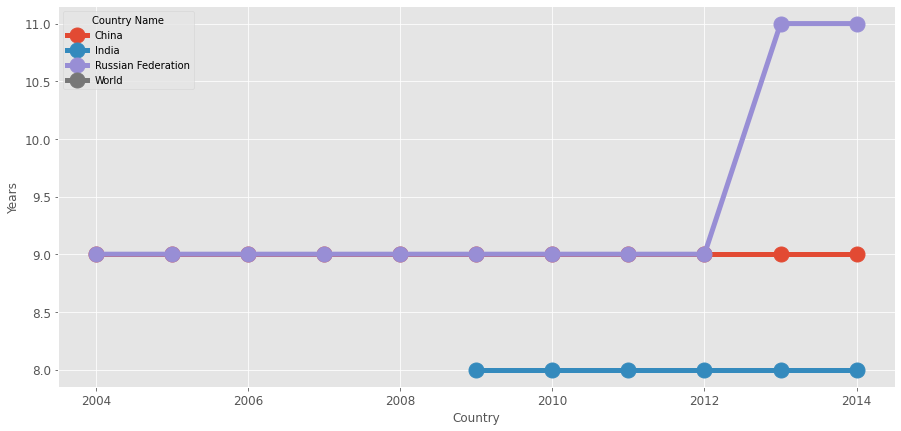

In [177]:
Edstats_data_precise_df=Edstats_data_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
Edstats_data_precise_df=Edstats_data_precise_df[(Edstats_data_df["Country Name"]=='World') | (Edstats_data_df["Country Name"]=='India') | (Edstats_data_df["Country Name"]=='China') 
| (Edstats_data_df["Country Name"]=='Russian Federation')]
df4=Edstats_data_precise_df[Edstats_data_precise_df["Indicator Name"]=='Duration of compulsory education (years)']
df4.reset_index()
df_compare=df4.groupby('Country Name')[['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']].mean()
df_compare=df_compare.T
plt.style.use('ggplot')
ax = df_compare.plot(figsize=(15,7),legend=True, fontsize=12 ,linewidth=5, marker="o",markersize=15) 
ax.set_xlabel("Country",fontsize=12)
ax.set_ylabel("Years",fontsize=12)
plt.show()


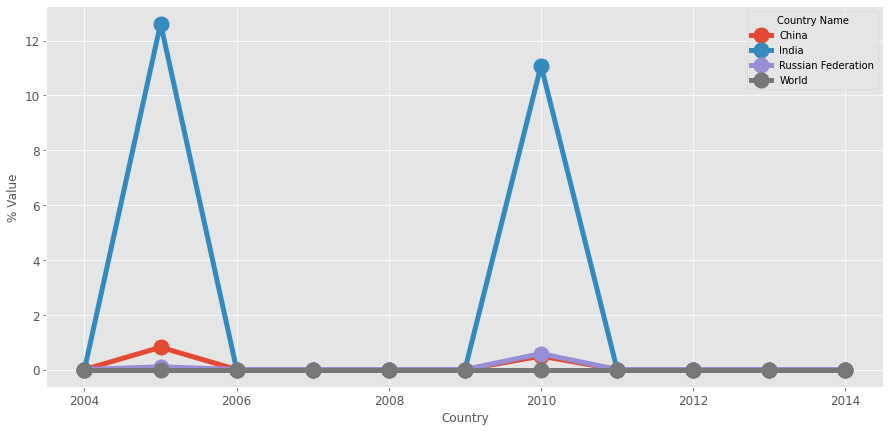

In [178]:
Edstats_data_precise_df=Edstats_data_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
Edstats_data_precise_df=Edstats_data_precise_df[(Edstats_data_df["Country Name"]=='World') | (Edstats_data_df["Country Name"]=='India') | (Edstats_data_df["Country Name"]=='China') 
 | (Edstats_data_df["Country Name"]=='Russian Federation')]
df4=Edstats_data_precise_df[Edstats_data_precise_df["Indicator Name"]=='Barro-Lee: Percentage of female population age 15-19 with no education']
df4.reset_index()
df_compare=df4.groupby('Country Name')[['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']].sum()
df_compare=df_compare.T
plt.style.use('ggplot')
ax = df_compare.plot(figsize=(15,7),legend=True, fontsize=12 ,linewidth=5, marker="o",markersize=15) 
ax.set_xlabel("Country",fontsize=12)
ax.set_ylabel("% Value",fontsize=12)
plt.show()

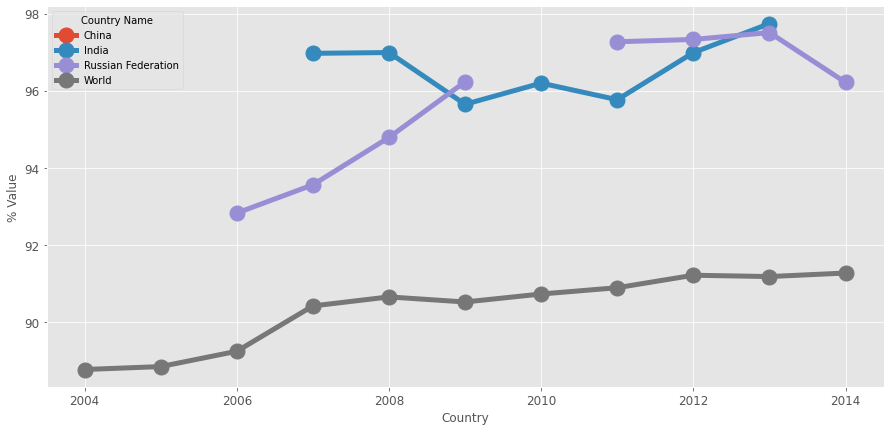

In [179]:
Edstats_data_precise_df=Edstats_data_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
Edstats_data_precise_df=Edstats_data_precise_df[(Edstats_data_df["Country Name"]=='World') | (Edstats_data_df["Country Name"]=='India') | (Edstats_data_df["Country Name"]=='China') 
|(Edstats_data_df["Country Name"]=='Russian Federation')]
df4=Edstats_data_precise_df[Edstats_data_precise_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)']
df4.reset_index()
df_compare=df4.groupby('Country Name')[['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']].mean()
df_compare=df_compare.T
plt.style.use('ggplot')
ax = df_compare.plot(figsize=(15,7),legend=True, fontsize=12 ,linewidth=5, marker="o",markersize=15)
ax.set_xlabel("Country",fontsize=12)
ax.set_ylabel("% Value",fontsize=12)
plt.show()

In [180]:
neww_df=Edstats_data_df[(Edstats_data_df["Country Name"]=='Arab World') & (Edstats_data_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)')]

newww_df=neww_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
india_df=Edstats_data_df[(Edstats_data_df["Country Name"]=='India') & (Edstats_data_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)')]
inewww_df=neww_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]

In [181]:
neww_df=Edstats_data_df[(Edstats_data_df["Country Name"]=='Arab World') & (Edstats_data_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)')]
neww_df

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
newww_df=neww_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
newww_df

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152


In [183]:
india_df=Edstats_data_df[(Edstats_data_df["Country Name"]=='India') & (Edstats_data_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)')]
inewww_df=neww_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
inewww_df

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152


In [184]:
india_df

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
414149,India,IND,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.136543,84.063087,83.869987,88.703056,NaN,NaN,NaN,96.96656,96.987038,95.643608,96.19281,95.762993,96.984512,97.738869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
#Calculating mean for all Data

country1_df=Edstats_data_df[(Edstats_data_df['Country Name'] =='India' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3 ]].mean().dropna().to_frame()


In [186]:
country1_df

,0
1970,63.10
1975,62.36
1980,62.50
1985,55.22
1990,45.11
1995,37.21
2000,30.22
2005,12.62
2010,11.09


In [187]:
country2_df=Edstats_data_df[(Edstats_data_df['Country Name'] =='Arab' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i>3 ]].mean().dropna().to_frame()


In [188]:
country3_df=Edstats_data_df[(Edstats_data_df['Country Name'] =='China' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna().to_frame()
country3_df

,0
1970,7.78
1975,7.78
1980,3.39
1985,3.08
1990,4.45
1995,2.45
2000,1.32
2005,0.81
2010,0.49


In [189]:
country4_df=Edstats_data_df[(Edstats_data_df['Country Name'] =='Russian federation' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna().to_frame()
country4_df

,0


In [190]:
country5_df=Edstats_data_df[(Edstats_data_df['Country Name'] =='World' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna().to_frame()
country5_df

,0
